In [1]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [2]:
local_zip = r"C:\Users\Mahtab\Downloads\main dataset_insv03.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\Mahtab\Downloads/')
zip_ref.close()

base_dir = r"C:\Users\Mahtab\Downloads\main dataset_insv03"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training clean pictures
train_clean_dir = os.path.join(train_dir, 'clean')

# Directory with our training dirty pictures
train_dirty_dir = os.path.join(train_dir, 'dirty')

# Directory with our validation clean pictures
validation_clean_dir = os.path.join(validation_dir, 'clean')

# Directory with our validation dirty pictures
validation_dirty_dir = os.path.join(validation_dir, 'dirty')

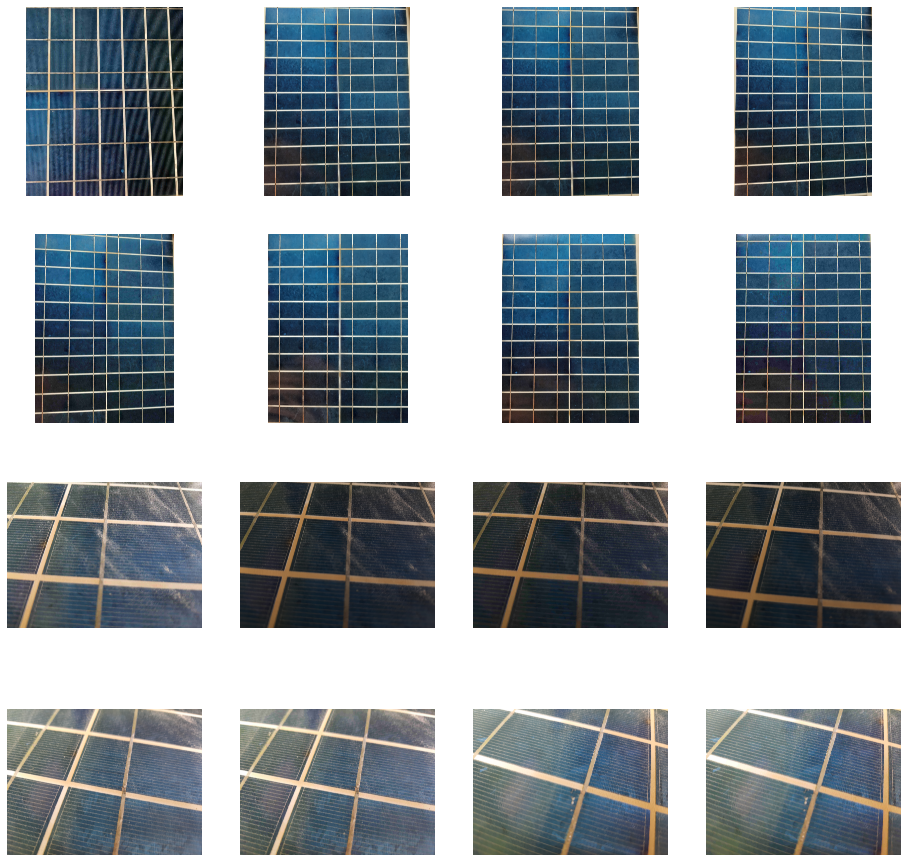

In [3]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_clean_fnames = os.listdir( train_clean_dir )
train_dirty_fnames = os.listdir( train_dirty_dir )


next_clean_pix = [os.path.join(train_clean_dir, fname) 
                for fname in train_clean_fnames[ pic_index-8:pic_index] 
               ]

next_dirty_pix = [os.path.join(train_dirty_dir, fname) 
                for fname in train_dirty_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_clean_pix+next_dirty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [4]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 1195 images belonging to 2 classes.
Found 504 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [7]:

for layer in base_model.layers:
    layer.trainable = False

In [8]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [9]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 40, epochs =60 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
40/40 [==============================] - 321s 8s/step - loss: 1.7734 - acc: 0.6388 - val_loss: 0.5530 - val_acc: 0.7143
Epoch 2/60
40/40 [==============================] - 334s 8s/step - loss: 0.6202 - acc: 0.7212 - val_loss: 0.6016 - val_acc: 0.6905
Epoch 3/60
40/40 [==============================] - 330s 8s/step - loss: 0.6114 - acc: 0.7375 - val_loss: 0.4561 - val_acc: 0.7857
Epoch 4/60
40/40 [==============================] - 322s 8s/step - loss: 0.4833 - acc: 0.7925 - val_loss: 0.6123 - val_acc: 0.7123
Epoch 5/60
40/40 [==============================] - 321s 8s/step - loss: 0.4827 - acc: 0.7849 - val_loss: 0.5019 - val_acc: 0.7401
Epoch 6/60
40/40 [==============================] - 325s 8s/step - loss: 0.5096 - acc: 0.7736 - val_loss: 0.7269 - val_acc: 0.6845
Epoch 7/60
40/40 [==============================] - 307s 8s/step - loss: 0.4114 - acc: 0.8314 - val_loss: 0.4563 - val_acc: 0.7738
Epoch 8